> This is the second of in total 3 exercises which are examinated within the lecture "Solarthermische Kraftwerke" at Technische Universität München

# Second Exercise

In this exercise we will have a more detailed look at the power plants which are installed arround the globe. 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
# To Visualize the data as map
import folium

> The first task are already done in this exercise. To get a better overview the location sites are plotted in the map below. 

> Click on the marker to get the name and the year of operation of the power plant. Add more details if needed.

In [46]:
# Load the data as pandas dataframe
df = pd.read_csv('./csp-guru/csp-guru/csp-guru.csv')
# fix wrong data
df.loc[122,'Year_construction_start'] = 2014 

In [47]:
df_droped_nan =df
# Split location coordinates to latitude and longitude
df_droped_nan[['Latitude', 'Longitude']] = df_droped_nan['Location_coordinates'].str.split(',', expand=True)
# COnvert string to float
df_droped_nan[['Latitude','Longitude']].astype(float)
# Drop rows with missing/NaN values
df_droped_nan.dropna(subset=['Latitude', 'Longitude'], inplace=True)
# Plot Map with folium
map = folium.Map(location=[0, 0],zoom_start = 2)
for index,row in df_droped_nan.iterrows():
    folium.Marker(
        location= [row['Latitude'], row['Longitude']], 
        popup=folium.Popup(
            row['Power_station'] + " Year of Operation: " + str(row['Year_operational']),
            parse_html=True, max_width=100),
    ).add_to(map)
map

## 1. General Tasks

### 1.1 How many entities does the dataset have?

In [48]:
# Number of entities
df.shape[0]

135

### 1.2 Visualize the data columns

In [49]:
print(df.columns)

Index(['Power_station', 'Local_spelling', 'OpenCSP_ID', 'Country', 'Region',
       'Status', 'Capacity_MW', 'Expected_generation_GWh_per_yr',
       'Capacity_factor', 'Technology', 'Hybridisation_capacity',
       'Hybridisation_ratio', 'Hybridisation_comment',
       'Year_construction_start', 'Year_operational',
       'State_highest_administrative_level',
       'Province_County_medium_administrative_level',
       'City_lowest_administrative_level', 'Location_coordinates',
       'DNI_kWh_per_m2_per_yr', 'Total_cost_million_currency_non_deflated',
       'Cost_currency', 'Currency_year', 'Total_cost_million_USD2020',
       'Specific_cost_USD2020_per_kW', 'LCOE_5_25_USD2020_per_kWh',
       'Remuneration_currency_per_kWh', 'Support_currency',
       'Cost_year_remuneration', 'Remuneration_USD2020_per_kWh_deflated',
       'PPA_or_support_duration_yr', 'Support_scheme_type',
       'Policy_support_scheme', 'Concessional_funding_other_support',
       'Land_area_whole_station_not_s

### 1.3 Group the dataset by 'Country' and have a look at the available entries. Are all entries always available?

In [50]:
# Sorts Table by Country and count the number of entries
country_count = df.groupby(['Country']).count()
country_count = country_count.sort_values(by='Country', ascending=False)
# Saves a variable to open with i.e. Data Wrangler in VS Code
country_count

,Power_station,Local_spelling,OpenCSP_ID,Region,Status,Capacity_MW,Expected_generation_GWh_per_yr,Capacity_factor,Technology,Hybridisation_capacity,...,Trough_SCA_length_m,Trough_number_of_loops,Trough_number_of_modules_per_SCA,Trough_number_of_SCA,Trough_number_of_SCA_per_loop,Construction_jobs_years,Annual_operations_jobs,Additional_sources_relative_to_2019_version_of_cspGURU_and_NRELSolarPACES_as_of_31_January_2020,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
United States,25,0,25,25,25,25,19,19,25,0,...,4,4,5,6,5,7,7,8,25,25
United Arab Emirates,4,0,4,4,4,3,1,1,4,1,...,1,1,1,1,1,0,0,2,4,4
Turkey,1,0,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
Thailand,1,0,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,0,1,1
Spain,50,0,50,50,50,50,50,50,50,1,...,37,44,32,45,43,33,36,0,50,50
South Africa,7,0,7,7,7,7,7,7,7,1,...,0,3,1,2,2,1,1,1,7,7
Saudi Arabia,2,0,2,2,2,2,0,0,2,2,...,0,0,0,0,0,0,0,1,2,2
Morocco,4,0,4,4,4,4,4,4,4,3,...,2,2,1,2,2,0,0,0,4,4
Mexico,1,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,0,0,1,1


> Answer: Not for all locaiton sites all informaiton is available

### 1.4 In your opinion, is the industry transparent with the data of the concentrating power plants?

> Yes, it is quite transparent. A lot of information is given, i.e. general information of total energy generation, coordinates, year of construction. Additional to this information the inlet temperature of the collectors, the specific cycle for energy transition, the total cost for building and LCOE are given. Therefore, the industry in the concentraiting solar power plants is transparent.

### 1.5 Are there any new power plants, which are currently under construction, but not included in the dataset?

> https://www.solarpaces.org/

### 2.1 In which country are the most Concentrating Solar Power Plants installed? Why is this so?

In [51]:
[df['Country'].groupby(df['Country']).count().idxmax(), df['Country'].groupby(df['Country']).count().max()]

['Spain', 50]

In [52]:
df['Country'].value_counts()

Country
Spain                   50
United States           25
China                   14
South Africa             7
India                    7
Australia                5
Morocco                  4
United Arab Emirates     4
Italy                    3
Israel                   2
Saudi Arabia             2
France                   2
Kuwait                   1
Mexico                   1
Denmark                  1
Turkey                   1
Canada                   1
Thailand                 1
Egypt                    1
Algeria                  1
Germany                  1
Chile                    1
Name: count, dtype: int64

 A little history:

> "In September 2002, Spain was the first European country to introduce a “feed-in tariff” funding system for solar thermal power. This funding system granted a premium on top of the electricity pool price of 12 € cents for each kWh output of a solar thermal plant between 100 kW and 50 MW of capacity, which could be changed every four years. But this amount proved not bankable nor did it cover the cost and risks to make the first projects feasible.
>The Royal Decree 436/2004 introduced two alternative remuneration options for new CSP installed capacity. Solar thermal electricity generators who sell their production to a distributor receive as fixed tariff 300% of the reference price (7.2 € cents/kWh) during the first 25 years and 240% afterwards.
>Solar thermal electricity generators who sell their electricity on the free market receive the negotiated market price of electricity, a premium of 250% of the reference price during the first 25 years, 200% afterwards, and an incentive of 10%."
Information taken from : https://www.solarpaces.org/worldwide-csp/csp-potential-solar-thermal-energy-by-country/spain/

### 2.2 Which country has the biggest installed capacity of solar concentrating power plants?

In [53]:
# Convert Latitude to numeric, coercing errors to NaN
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

# Group by Country and calculate mean Latitude
mean_latitude = df.groupby('Country')['Latitude'].mean().reset_index()

In [54]:
# Convert Latitude to numeric, coercing errors to NaN
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Group by Country and calculate mean Latitude
mean_longitude = df.groupby('Country')['Longitude'].mean().reset_index()
mean_coordinates = pd.merge(mean_latitude, mean_longitude, on='Country')

In [55]:
# Groub by Country and calculate the total capacity
country_capacity = df.groupby('Country')['Capacity_MW'].sum().reset_index()
# Sort the table descending
country_capacity = country_capacity.sort_values(by='Capacity_MW',
                                                ascending=False)
# Merge the two dataframes
country_capacity = pd.merge(country_capacity, mean_coordinates,
                            on='Country')
country_capacity.head(25)

,Country,Capacity_MW,Latitude,Longitude
0,Spain,2304.9,38.333440,-4.914180
1,United States,1805.8,34.360720,-116.450880
2,United Arab Emirates,800.0,24.462500,54.949000
3,South Africa,600.0,-28.513354,21.465312
4,China,596.0,39.425342,99.767241
5,India,342.5,25.986857,74.532143
6,Morocco,333.0,31.584000,-6.245500
7,Israel,231.0,30.964500,34.706000
8,Chile,110.0,-22.771000,-69.479000
9,Saudi Arabia,93.0,29.689800,37.162500


In [56]:
# Function to determine the size of the icon
def get_icon_size(capacity):
    return max(capacity/10 ,15) # Scale size as needed

# Create a Folium map
map_total_capacity = folium.Map(location=[0, 0], zoom_start=2)

# Add markers with adjustable size
for index, row in country_capacity.iterrows():
    icon_size = get_icon_size(row['Capacity_MW'])
    
    # Set the anchor point for the icon based on the icon size
    icon_anchor = (icon_size / 35, icon_size*1.3)  # Centered horizontally, bottom anchored

    # Create a DivIcon with custom size and centering
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(f"{row['Country']} Installed Capacity MW: {row['Capacity_MW']}",
                           parse_html=True, max_width=100),
        icon=folium.DivIcon(
            html=f'<div style="font-size: {icon_size}px; color: blue; text-align: center; transform: translate(-50%, 0);">|</div>',  # Using a circle >⬤< character can also be used
            icon_size=(icon_size, icon_size),
            icon_anchor=icon_anchor
        )
    ).add_to(map_total_capacity)

# Display the map
map_total_capacity

### 2.3 What is meant with LCOE? How is it defined? Is it a good way to compare CSP plants?

The LCOE is calculated by adding up all costs of production, divided by the total amount of energy it is expected to generate

$\text{LCOE} = \frac{\sum_{t=1}^{n} \frac{I_t + M_t + F_t}{(1+r)^t}}{\sum_{t=1}^{n} \frac{E_t}{(1+r)^t}}$

Where:
- $ I_t $ = Investment costs in year $ t $
- $ M_t $ = Operating and maintenance costs in year $t$
- $ F_t $ = Fuel costs in year $t$
- $ E_t $ = Electricity generated in year $ t$
- $ r$ = Discount rate
- $ n $ = The lifetime of the plant in years

Source: <https://en.wikipedia.org/wiki/Levelized_cost_of_electricity>

>The levelised cost of energy (LCOE) is a metric used to estimate the average cost of electricity generation over the lifetime of a power plant. The levelised cost of energy (LCOE) is a metric that can be used to determine the viability and competitiveness of an electricity generation project.
In order to calculate the LCOE, it is necessary to consider the costs associated with building and operating a power plant over its lifetime. These costs include capital, fuel and maintenance costs.

> LCOE approach does not always allow for an clean and objective comparison of different plant sites. Especially with renewable energy, which is weather-dependant and not dispatchable.

### 2.4 What is the average LCOE around the world grouped by country? Does Spain also have the lowest LCOE? 

In [57]:
df.groupby('Country')['LCOE_5_25_USD2020_per_kWh'].mean().sort_values(ascending=False).reset_index()

,Country,LCOE_5_25_USD2020_per_kWh
0,South Africa,2.032857
1,Australia,0.640000
2,Canada,0.570000
3,United States,0.287500
4,Spain,0.271633
5,United Arab Emirates,0.270000
6,Israel,0.220000
7,Morocco,0.215000
8,India,0.113333
9,China,0.100000


## 2.5 What is the most used technology in Solar Concentraiting Power Plants?

<Axes: xlabel='Technology'>

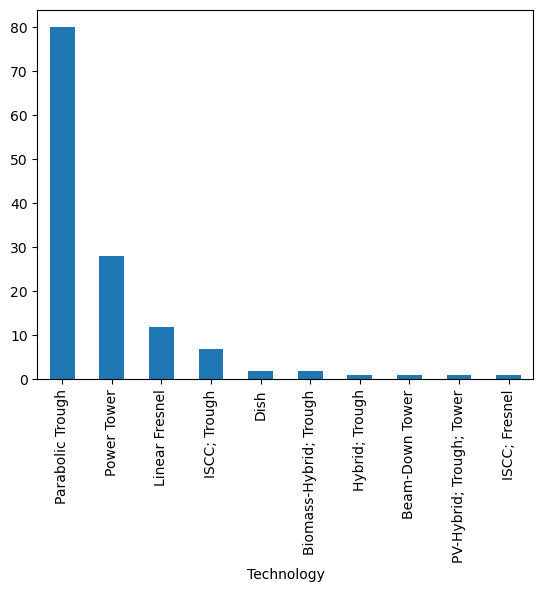

In [58]:
technologies = df['Technology'].value_counts()
technologies.plot(kind='bar')

## 2.6 Why is it not attractive to install Concentrating Solar Power Plants in comparison to photovoltaics? Compare Germany with Spain.

> It depends on the available radiation at a certain location. Spain has a higher Direct Normal Radiation compared to Germany (compare Exercise 1). The Direct Normal Radiation is the main radiation source for concentrating power plants. In comparison to photovoltaics, which can also use the Diffuse Horizontal Radiation 

## 2.7 Where is/are the plant sites in Germany?

In [59]:
df_germany = df[df['Country'] == 'Germany']
df_germany.head()

,Power_station,Local_spelling,OpenCSP_ID,Country,Region,Status,Capacity_MW,Expected_generation_GWh_per_yr,Capacity_factor,Technology,...,Trough_SCA_length_m,Trough_number_of_loops,Trough_number_of_modules_per_SCA,Trough_number_of_SCA,Trough_number_of_SCA_per_loop,Construction_jobs_years,Annual_operations_jobs,Additional_sources_relative_to_2019_version_of_cspGURU_and_NRELSolarPACES_as_of_31_January_2020,Latitude,Longitude
13,Jülich Solar Tower,NaN,14,Germany,Europe,Operational,1.5,NaN,NaN,Power Tower,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.915,6.388


# 3. Visualization 

## 3.1 Show the dependency of the construction year with the installed capacity:

Text(0.5, 0, 'Year of construction start')

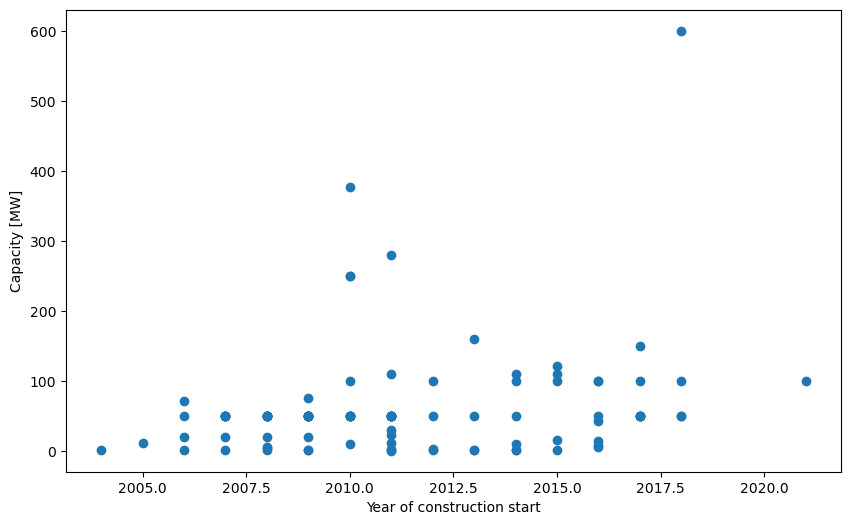

In [60]:
# Creat figure 
fig, ax = plt.subplots(1,1,figsize=(10,6))
# plot the data
y = df['Capacity_MW']
x = df['Year_construction_start']
# defining the plot typ
ax.scatter(x , y)
# Adding labels
ax.set_ylabel('Capacity [MW]')
ax.set_xlabel('Year of construction start')

## 3.2 Evaluate the investment cost per kW over the used technology for collecting the radiation.

In [61]:
# Specify the technologies list
techs = ["Parabolic Trough", "Linear Fresnel", "Power Tower", "Dish"]
#Specify the technologies datafreame
dftechs = df[df.Technology.isin(techs)]

In [62]:
# Define empty 
tech_costs = {}
for i in df.Technology.unique():
    tech_costs[i] = [
        df.loc[df.Technology == i, "Specific_cost_USD2020_per_kW"].mean(),
        df.loc[df.Technology == i, "Specific_cost_USD2020_per_kW"].std()
    ]

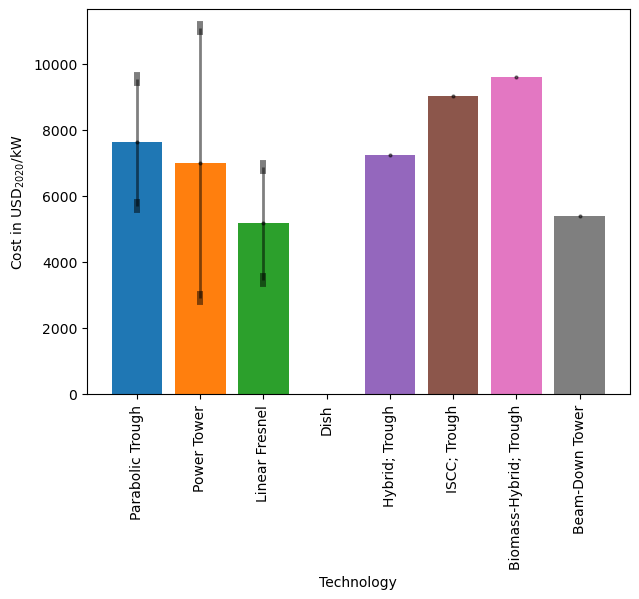

In [63]:
#Creat Figure
fig, ax = plt.subplots(1,1, figsize=(7,5))
for k, v in tech_costs.items():
    ax.bar(k, v[0])
    ax.errorbar(k, v[0], v[1], fmt='.', color='Black',
                elinewidth=2,capthick=10,errorevery=1,
                alpha=0.5, ms=4, capsize = 2)

# Adding labels
ax.set_xlabel('Technology')
ax.set_ylabel('Cost in USD$_{2020}$/kW')
ax.tick_params(axis='x', rotation=90)
# save the figure
# plt.savefig('figure.png', dpi=400, transparent=True)
plt.show()

## 3.3 Evaluate the Dependecy of Total Investment Cost over the Storage Capacity in Hours 

> Additional Task: Make a regression line/ trend line 

In [64]:
dftower = df.loc[df.Technology == "Power Tower"]
dfpt = df.loc[df.Technology == "Parabolic Trough"]
dflf = df.loc[df.Technology == "Linear Fresnel"]

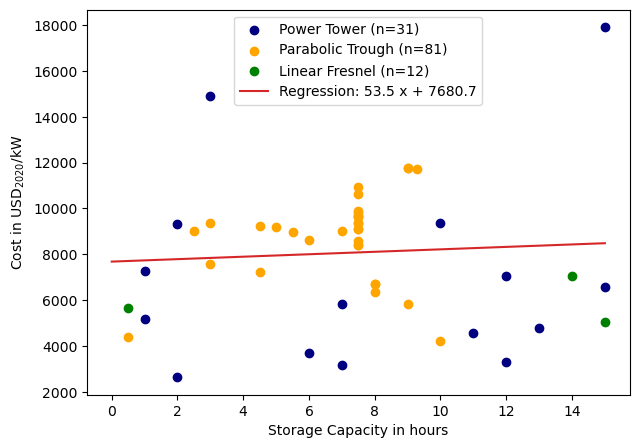

In [65]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

ax.scatter(dftower.Storage_capacity_hours, dftower.Specific_cost_USD2020_per_kW,
           c="navy", label=f"Power Tower (n=31)")
ax.scatter(dfpt.Storage_capacity_hours, dfpt.Specific_cost_USD2020_per_kW,
           c="orange", label="Parabolic Trough (n=81)")
ax.scatter(dflf.Storage_capacity_hours, dflf.Specific_cost_USD2020_per_kW,
           c="green", label="Linear Fresnel (n=12)")

# add all technologies and drop where there are no storage_capacity_hours
dfall = dftechs.loc[pd.notna(dftechs.Storage_capacity_hours)]
dfall = dfall.loc[pd.notna(dfall.Specific_cost_USD2020_per_kW)]

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    dfall.Storage_capacity_hours, dfall.Specific_cost_USD2020_per_kW)
x = np.linspace(0, 15, 100)
y = slope * x + intercept
ax.plot(x, y, c="C3", label=f"Regression: {slope:.1f} x + {intercept:.1f}")

ax.set_xlabel('Storage Capacity in hours')
ax.set_ylabel('Cost in USD$_{2020}$/kW')
plt.legend()

## 3.4 Evaluate the Total Investment Cost over the Total Installed Capacity in Hours

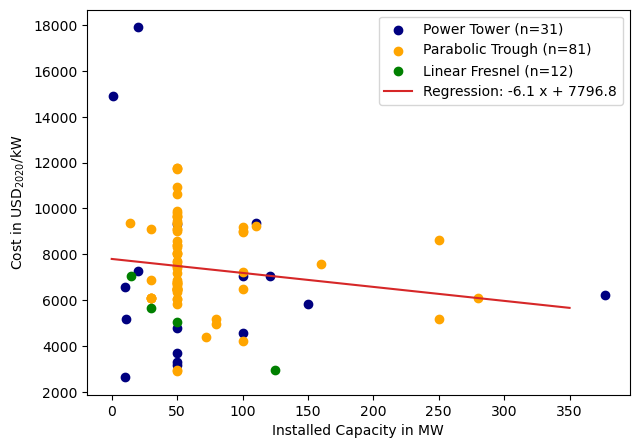

In [66]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

# potential regression of the data
ax.scatter(dftower.Capacity_MW, dftower.Specific_cost_USD2020_per_kW, c="navy",
           label=f"Power Tower (n=31)")
ax.scatter(dfpt.Capacity_MW, dfpt.Specific_cost_USD2020_per_kW, c="orange",
           label="Parabolic Trough (n=81)")
ax.scatter(dflf.Capacity_MW, dflf.Specific_cost_USD2020_per_kW, c="green",
           label="Linear Fresnel (n=12)")

dfall = dftechs.loc[pd.notna(dftechs.Capacity_MW)]
dfall = dfall.loc[pd.notna(dfall.Specific_cost_USD2020_per_kW)]

slope, intercept, r_value, p_value, std_err = stats.linregress(
    dfall.Capacity_MW, dfall.Specific_cost_USD2020_per_kW)
x = np.linspace(0, 350, 100)
y = slope * x + intercept
ax.plot(x, y, c="C3", label=f"Regression: {slope:.1f} x + {intercept:.1f}")

ax.set_xlabel('Installed Capacity in MW')
ax.set_ylabel('Cost in USD$_{2020}$/kW')
plt.legend()